Exploratory data analysis (EDA) is covered in this project, to study employee attrition dataset for useful insights.

# The Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_theme(palette = 'tab10')

import warnings
warnings.filterwarnings('ignore', category = FutureWarning, module = 'seaborn')

In [3]:
hr_df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print('Shape of data:', hr_df.shape)
print('Shape of data without duplicates:', hr_df.drop_duplicates().shape)

Shape of data: (1470, 35)
Shape of data without duplicates: (1470, 35)


In [6]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Exploring data analysis

In [8]:
df = hr_df.copy()

### Distribution of `Attrition`

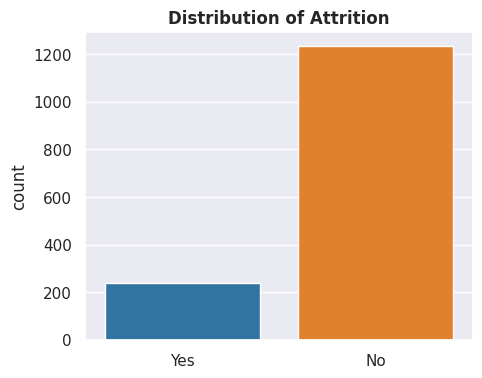

Attrition Distribution (%): Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize = (5, 4))
sns.countplot(data = df, x = 'Attrition')
plt.title('Distribution of Attrition', fontweight = 'bold')
plt.xlabel('')
plt.show()

print('Attrition Distribution (%):', hr_df['Attrition'].value_counts(normalize = True) * 100)

### `Attrition` by features

In [10]:
demo_ft = ['Age', 'DistanceFromHome', 'TotalWorkingYears', 'Gender', 'MaritalStatus', 'EducationField']

for col in demo_ft:
    if df[col].nunique() <= 10:
        print(pd.crosstab(df[col], df['Attrition'], normalize = 'index') * 100)
        print('------------------')

Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803
------------------
Attrition             No        Yes
MaritalStatus                      
Divorced       89.908257  10.091743
Married        87.518574  12.481426
Single         74.468085  25.531915
------------------
Attrition                No        Yes
EducationField                        
Human Resources   74.074074  25.925926
Life Sciences     85.313531  14.686469
Marketing         77.987421  22.012579
Medical           86.422414  13.577586
Other             86.585366  13.414634
Technical Degree  75.757576  24.242424
------------------


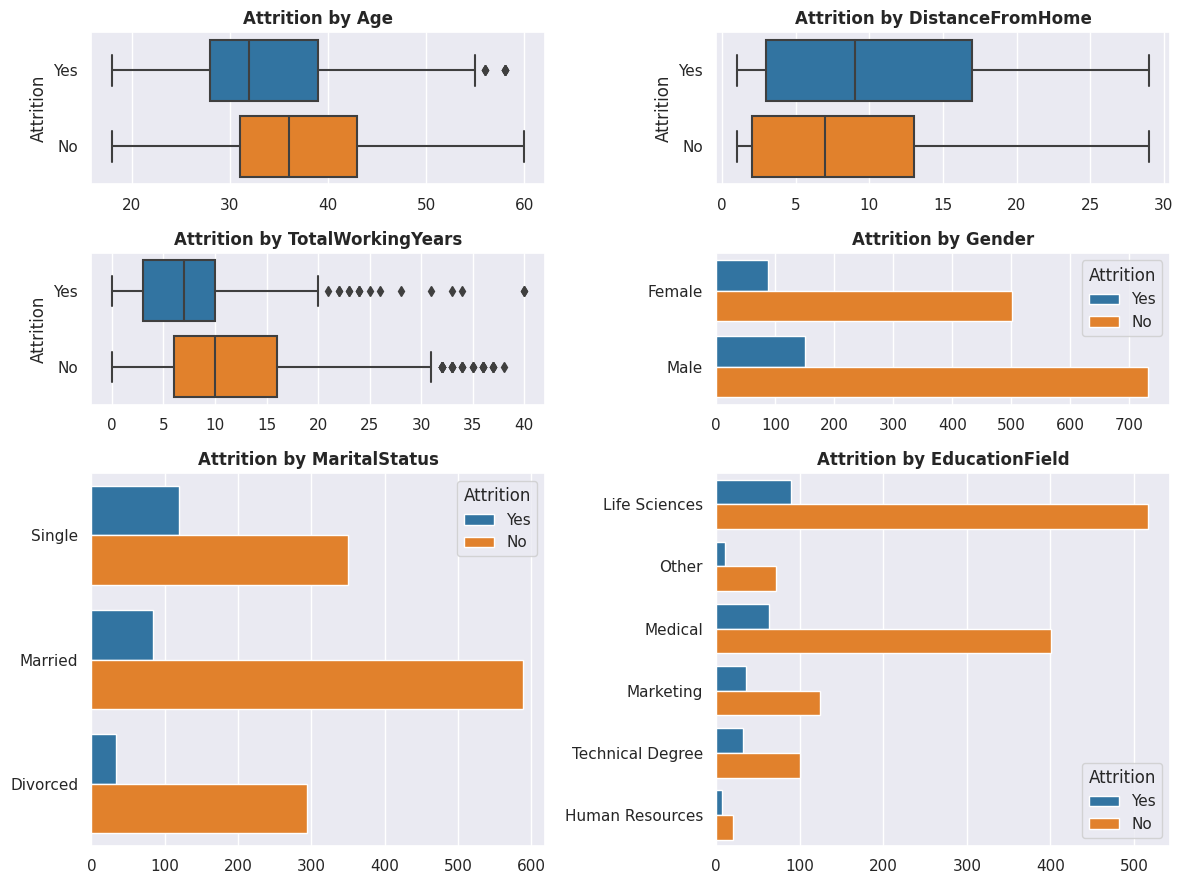

In [11]:
fig = plt.figure(figsize = (12, 9))
gs = gridspec.GridSpec(4, 2, figure = fig)

axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2:, 0]),
    fig.add_subplot(gs[2:, 1])    
]

for ax, ft in zip(axes, demo_ft):
    if df[ft].nunique() >= 10:
        sns.boxplot(data = df, x = ft, y = 'Attrition', ax = ax)
    else:
        sns.countplot(data = df, y = ft, hue = 'Attrition', ax = ax)
        ax.set_ylabel('')
    
    ax.set_title(f'Attrition by {ft}', fontweight = 'bold')
    ax.set_xlabel('')


plt.tight_layout()
plt.show()

In [12]:
role_ft = ['Department', 'JobRole', 'JobLevel']

for col in role_ft:
    if df[col].nunique() <= 10:
        print(pd.crosstab(df[col], df['Attrition'], normalize = 'index') * 100)
        print('------------------')

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803
------------------
Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036
------------------
Attrition         No        Yes
JobLevel                       
1          73.664825  26.335175
2          90.262172   9.737828
3          85.321101  14.678899
4          95.283019   4.716981
5          92.753

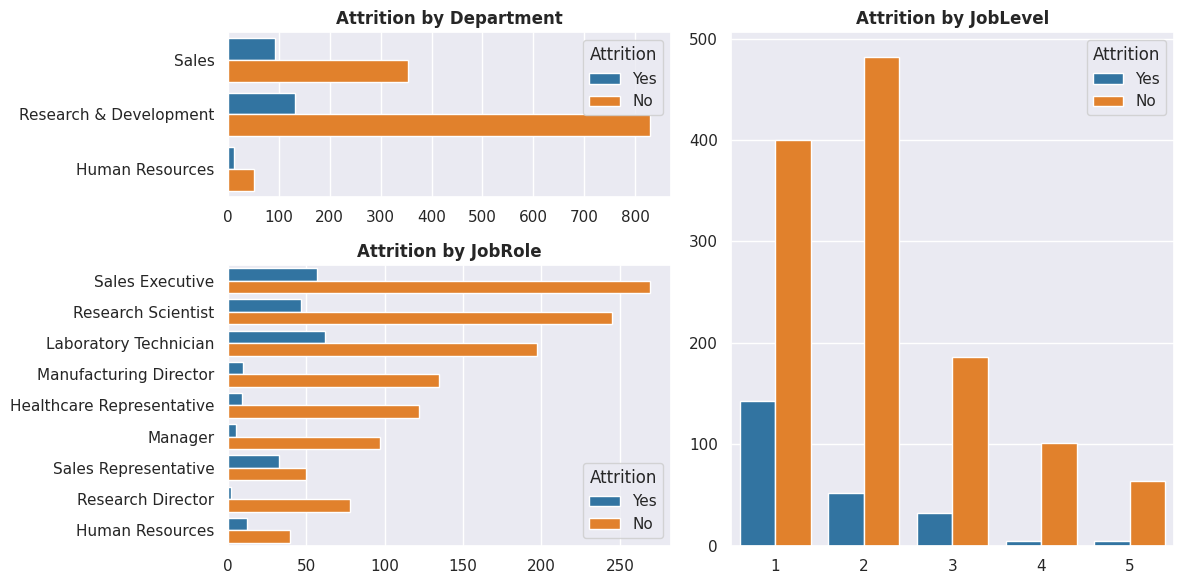

In [13]:
fig = plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(5, 2, figure = fig)

axes = [
    fig.add_subplot(gs[:2, 0]),
    fig.add_subplot(gs[2:, 0]),
    fig.add_subplot(gs[0:, 1])
]

for ax, ft in zip(axes, role_ft):
    if df[ft].dtypes == 'int':
        sns.countplot(data = df, x = ft, hue = 'Attrition', ax = ax)
    else:
        sns.countplot(data = df, y = ft, hue = 'Attrition', ax = ax)
    ax.set_title(f'Attrition by {ft}', fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.tight_layout()
plt.show()

In [14]:
satisfaction_ft = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']

for col in satisfaction_ft:
    if df[col].nunique() <= 10:
        print(pd.crosstab(df[col], df['Attrition'], normalize = 'index') * 100)
        print('------------------')

Attrition                       No        Yes
EnvironmentSatisfaction                      
1                        74.647887  25.352113
2                        85.017422  14.982578
3                        86.313466  13.686534
4                        86.547085  13.452915
------------------
Attrition               No        Yes
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976
------------------
Attrition                        No        Yes
RelationshipSatisfaction                      
1                         79.347826  20.652174
2                         85.148515  14.851485
3                         84.531590  15.468410
4                         85.185185  14.814815
------------------


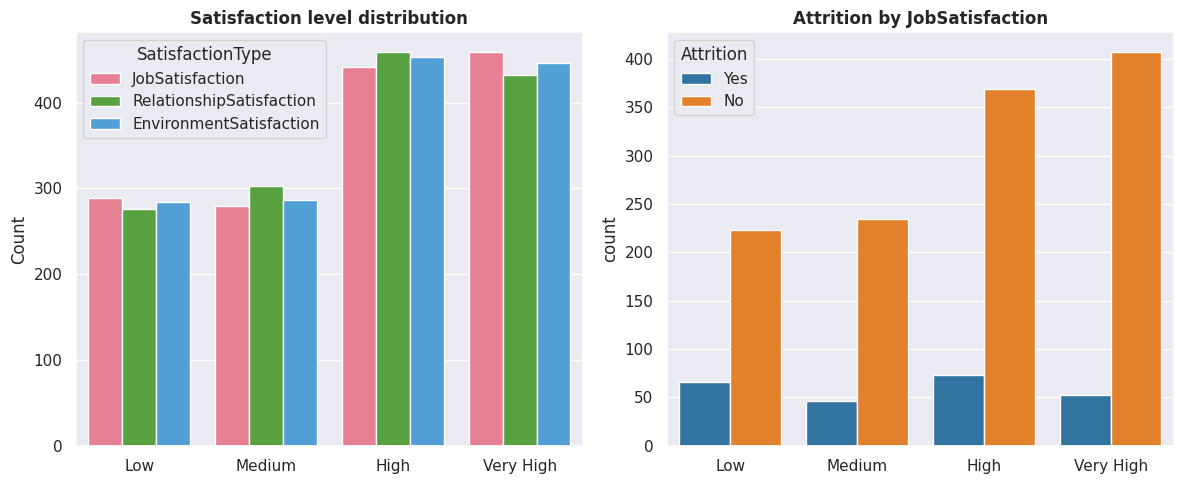

In [15]:
level = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

fig = plt.figure(figsize = (12, 5))
ax1 = plt.subplot2grid((1, 2),(0, 0))
ax2 = plt.subplot2grid((1, 2),(0, 1))

# satisfaction type
satisfaction = df.melt(value_vars = satisfaction_ft, var_name = 'SatisfactionType', value_name = 'Level').value_counts().reset_index(name = 'Count')
satisfaction['Level'] = satisfaction['Level'].map(level)
sns.barplot(data = satisfaction, x = 'Level', y = 'Count', order = level.values(), hue = 'SatisfactionType', palette = 'husl', ax = ax1)
ax1.set_title('Satisfaction level distribution', fontweight = 'bold')
ax1.set_xlabel('')

# job satisfaction
sns.countplot(data = df, x = satisfaction_ft[1], order = level.keys(), hue = 'Attrition', ax = ax2)
ax2.set_title(f'Attrition by {satisfaction_ft[1]}', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_xticklabels(level.values(), rotation = 0)


plt.tight_layout()
plt.show()

In [16]:
engagement_ft = ['OverTime', 'JobInvolvement', 'WorkLifeBalance', 'PerformanceRating']

for col in engagement_ft:
    if df[col].nunique() <= 10:
        print(pd.crosstab(df[col], df['Attrition'], normalize = 'index') * 100)
        print('------------------')

Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846
------------------
Attrition              No        Yes
JobInvolvement                      
1               66.265060  33.734940
2               81.066667  18.933333
3               85.599078  14.400922
4               90.972222   9.027778
------------------
Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059
------------------
Attrition                 No        Yes
PerformanceRating                      
3                  83.922830  16.077170
4                  83.628319  16.371681
------------------


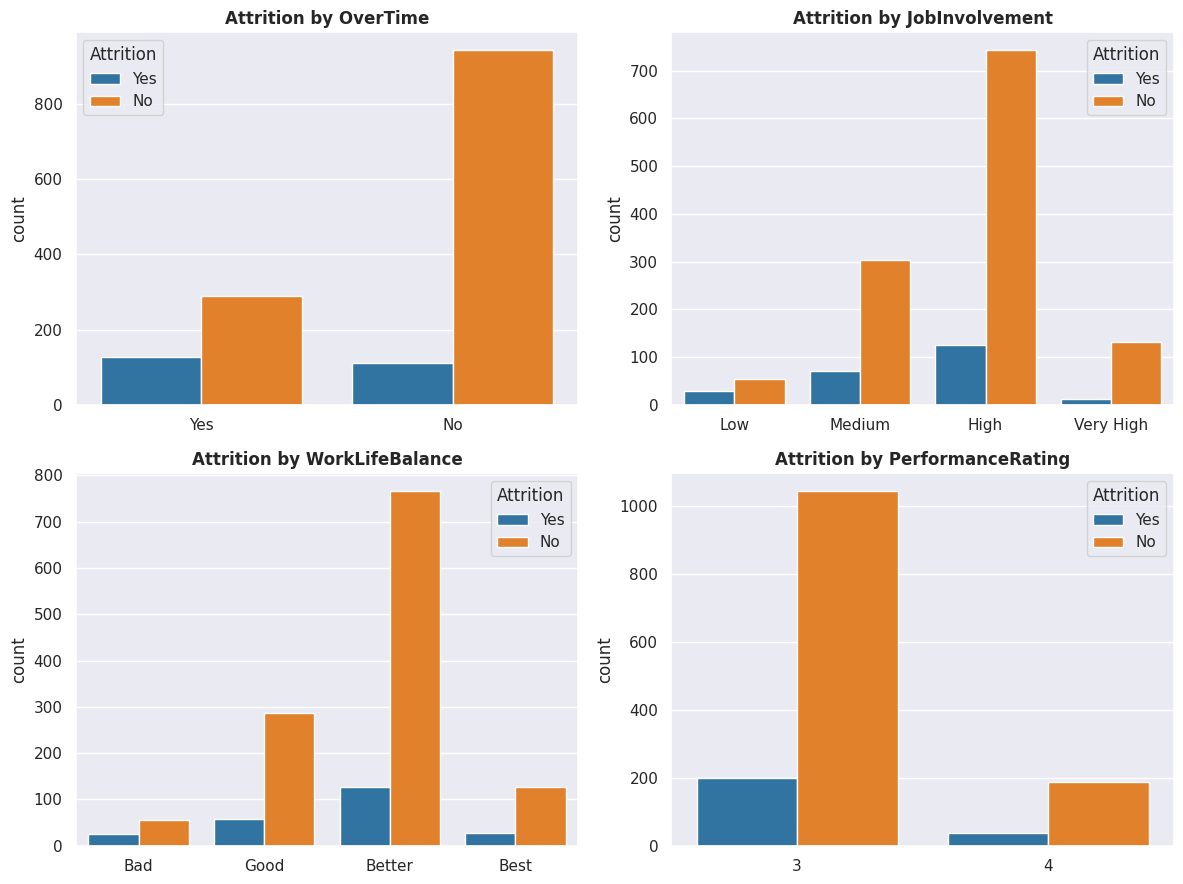

In [17]:
balance = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

fig = plt.figure(figsize = (12, 9))
ax1 = plt.subplot2grid((2, 2),(0, 0))
ax2 = plt.subplot2grid((2, 2),(0, 1))
ax3 = plt.subplot2grid((2, 2),(1, 0))
ax4 = plt.subplot2grid((2, 2),(1, 1))

# overtime
sns.countplot(data = df, x = engagement_ft[0], hue = 'Attrition', ax = ax1)
ax1.set_title(f'Attrition by {engagement_ft[0]}', fontweight = 'bold')
ax1.set_xlabel('')

# job involvement
sns.countplot(data = df, x = engagement_ft[1], order = level.keys(), hue = 'Attrition', ax = ax2)
ax2.set_title(f'Attrition by {engagement_ft[1]}', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_xticklabels(level.values(), rotation = 0)

# work-life balance
sns.countplot(data = df, x = engagement_ft[2], order = balance.keys(), hue = 'Attrition', ax = ax3)
ax3.set_title(f'Attrition by {engagement_ft[2]}', fontweight = 'bold')
ax3.set_xlabel('')
ax3.set_xticklabels(balance.values(), rotation = 0)
                       
# performance rating
sns.countplot(data = df, x = engagement_ft[3], hue = 'Attrition', ax = ax4)
ax4.set_title(f'Attrition by {engagement_ft[3]}', fontweight = 'bold')
ax4.set_xlabel('')


plt.tight_layout()
plt.show()

In [18]:
incentive_ft = ['MonthlyIncome', 'BusinessTravel', 'StockOptionLevel']

for col in incentive_ft:
    if df[col].nunique() <= 10:
        print(pd.crosstab(df[col], df['Attrition'], normalize = 'index') * 100)
        print('------------------')

Attrition                 No        Yes
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855
------------------
Attrition                No        Yes
StockOptionLevel                      
0                 75.594295  24.405705
1                 90.604027   9.395973
2                 92.405063   7.594937
3                 82.352941  17.647059
------------------


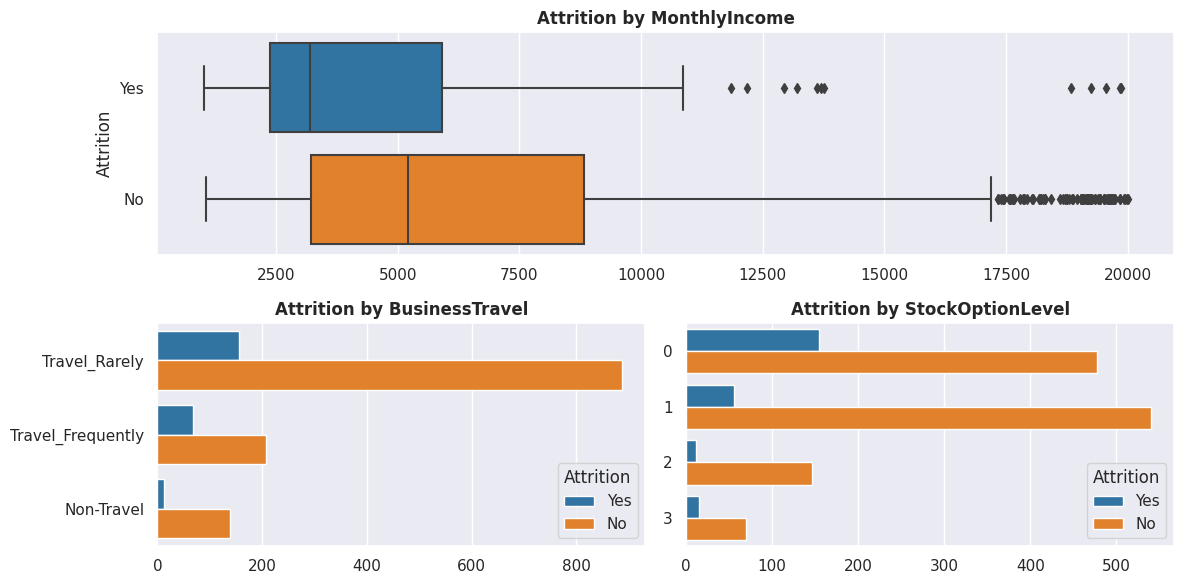

In [19]:
fig = plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(2, 2, figure = fig)

axes = [
    fig.add_subplot(gs[0, 0:]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1])
]

for ax, ft in zip(axes, incentive_ft):
    if df[ft].nunique() <= 10:
        sns.countplot(data = df, y = ft, hue = 'Attrition', ax = ax)
        ax.set_ylabel('')
    else:
        sns.boxplot(data = df, x = ft, y = 'Attrition', ax = ax)
    ax.set_title(f'Attrition by {ft}', fontweight = 'bold')
    ax.set_xlabel('')


plt.tight_layout()
plt.show()

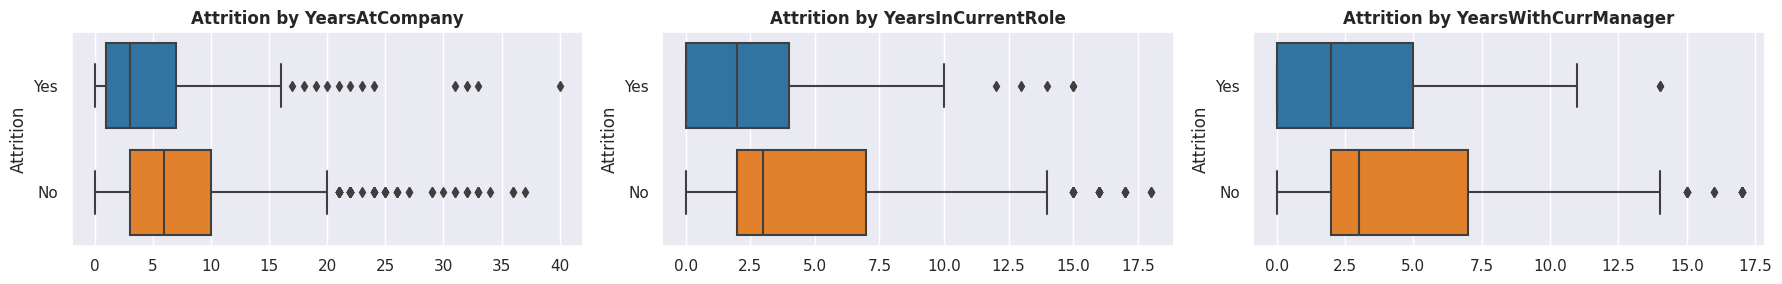

In [20]:
career_ft = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

fig, axes = plt.subplots(1, 3, figsize = (18, 3))

for ax, ft in zip(axes, career_ft):
    sns.boxplot(data = df, x = ft, y = 'Attrition', ax = ax)
    ax.set_title(f'Attrition by {ft}', fontweight = 'bold')
    ax.set_xlabel('')


plt.tight_layout()
plt.show()

In [21]:
df_jittered = df[['Attrition', 'MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion']].copy()

df_jittered['YearsAtCompany'] = df_jittered['YearsAtCompany'] + np.random.uniform(-0.3, 0.3, size = len(df))
df_jittered['YearsSinceLastPromotion'] = df_jittered['YearsSinceLastPromotion'] + np.random.uniform(-0.3, 0.3, size = len(df))

df_jittered.head()

,Attrition,MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion
0,Yes,5993,5.758583,0.221550
1,No,5130,9.811930,1.269226
2,Yes,2090,0.105423,0.115878
3,No,2909,8.135457,2.830819
4,No,3468,2.193927,2.149126


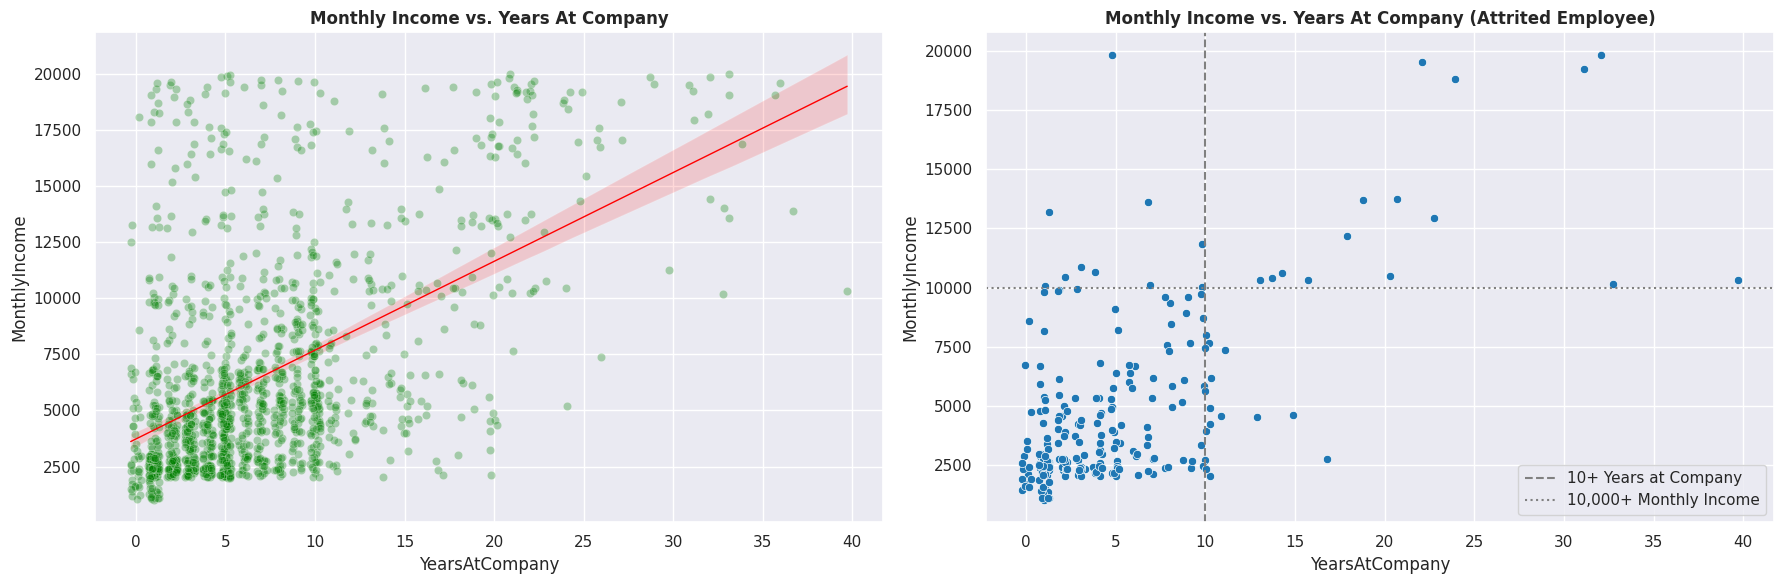

In [22]:
fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot2grid((1, 2),(0, 0))
ax2 = plt.subplot2grid((1, 2),(0, 1))

sns.regplot(data = df_jittered, x = 'YearsAtCompany', y = 'MonthlyIncome', scatter = False, color = 'red', line_kws = {'linewidth': 1}, ax = ax1)
sns.scatterplot(data = df_jittered, x = 'YearsAtCompany', y = 'MonthlyIncome', color = 'green', alpha = 0.3, ax = ax1)
ax1.set_title('Monthly Income vs. Years At Company', fontweight = 'bold')

sns.scatterplot(data = df_jittered[df_jittered['Attrition'] == 'Yes'], x = 'YearsAtCompany', y = 'MonthlyIncome', color = '#1f77b4', ax = ax2)
ax2.axvline(10, color = 'gray', linestyle = 'dashed', label = '10+ Years at Company')
ax2.axhline(10000, color = 'gray', linestyle = 'dotted', label = '10,000+ Monthly Income')
ax2.legend()
ax2.set_title('Monthly Income vs. Years At Company (Attrited Employee)', fontweight = 'bold')

                       
plt.tight_layout()
plt.show()

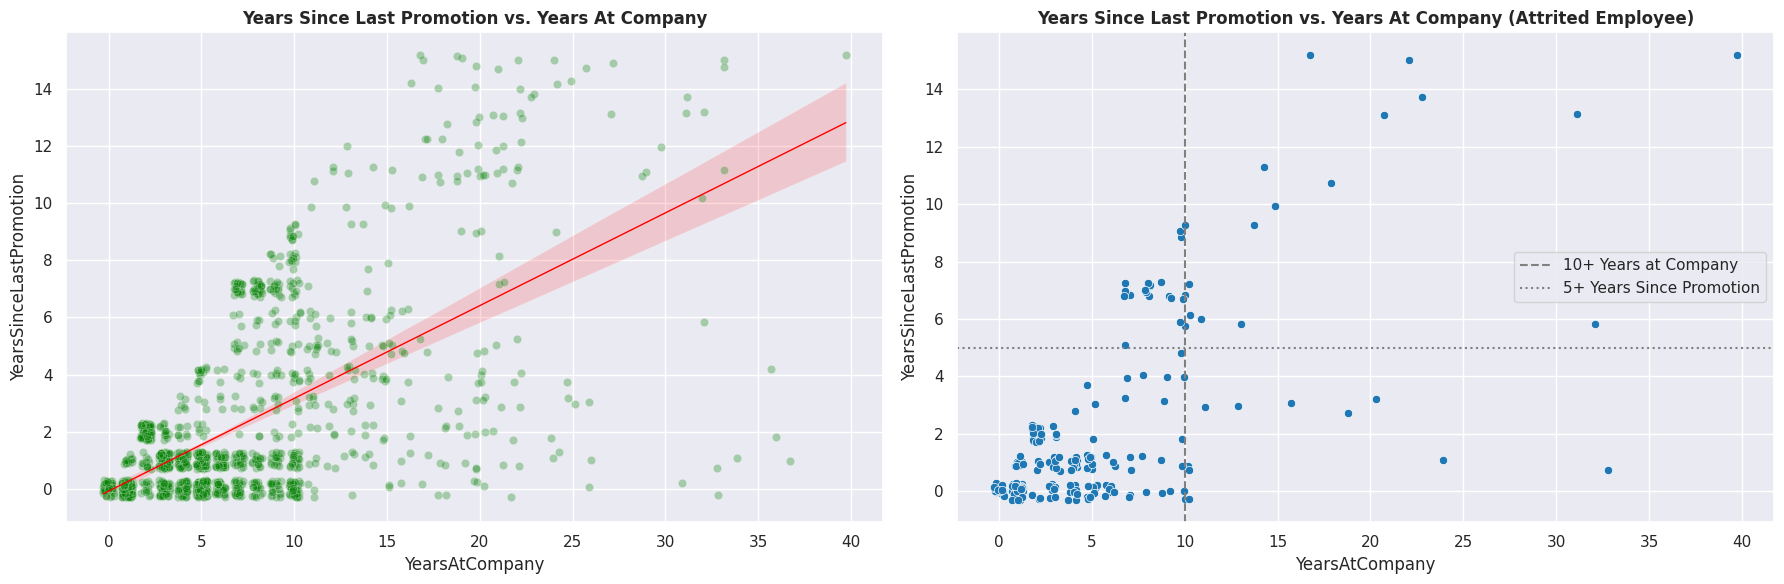

In [23]:
fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot2grid((1, 2),(0, 0))
ax2 = plt.subplot2grid((1, 2),(0, 1))

sns.regplot(data = df_jittered, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', scatter = False, color = 'red', line_kws = {'linewidth': 1}, ax = ax1)
sns.scatterplot(data = df_jittered, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', color = 'green', alpha = 0.3, ax = ax1)
ax1.set_title('Years Since Last Promotion vs. Years At Company', fontweight = 'bold')

sns.scatterplot(data = df_jittered[df_jittered['Attrition'] == 'Yes'], x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', color = '#1f77b4', ax = ax2)
ax2.axvline(10, color = 'gray', linestyle = 'dashed', label = '10+ Years at Company')
ax2.axhline(5, color = 'gray', linestyle = 'dotted', label = '5+ Years Since Promotion')
ax2.legend()
ax2.set_title('Years Since Last Promotion vs. Years At Company (Attrited Employee)', fontweight = 'bold')

                       
plt.tight_layout()
plt.show()

# Summary & Insights

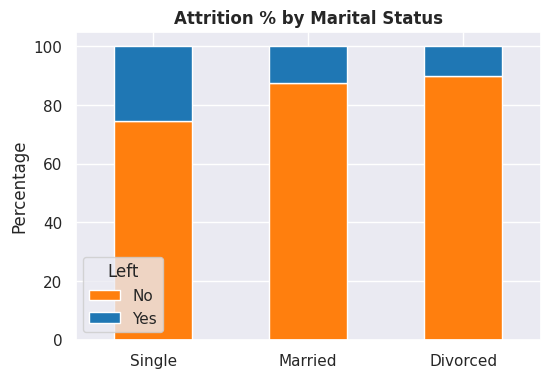

In [24]:
marital_left = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize = 'index') * 100
marital_left = marital_left.sort_values(by = 'Yes', ascending = False)

ax = marital_left.plot(kind = 'bar', stacked = True, figsize = (6, 4), color = {'Yes': '#1f77b4', 'No': '#ff7f0e'})
plt.title('Attrition % by Marital Status', fontweight = 'bold')
plt.xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.ylabel('Percentage')
plt.legend(title = 'Left', loc = 'lower left')
plt.savefig('attrition_by_marital.png', dpi = 300, bbox_inches = 'tight')
plt.show()

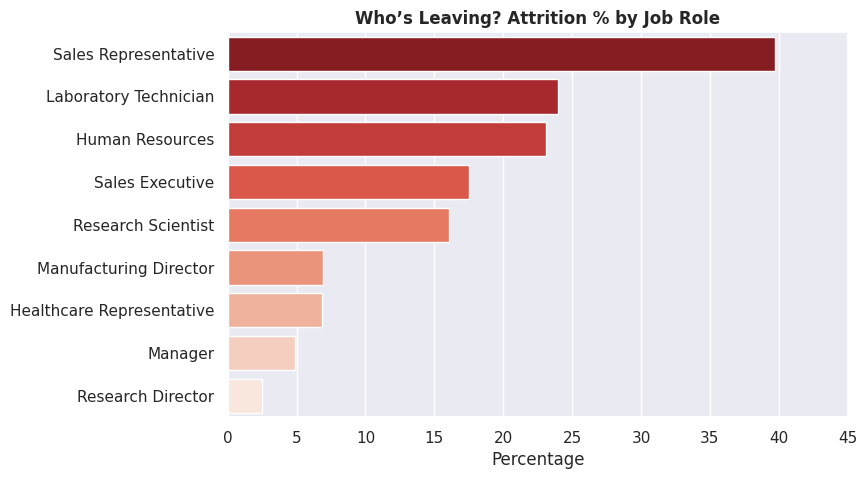

In [25]:
role_left = (
    df
    .groupby('JobRole', observed = False)['Attrition']
    .apply(lambda x: (x == 'Yes')
    .mean())
    .sort_values(ascending = False)
)

plt.figure(figsize = (8, 5))
sns.barplot(x = role_left.values * 100, y = role_left.index, order = role_left.index, palette = 'Reds_r')
plt.title('Who’s Leaving? Attrition % by Job Role', fontweight = 'bold')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xlim(0, 45)
plt.savefig('attrition_by_jobrole.png', dpi = 300, bbox_inches = 'tight')
plt.show()

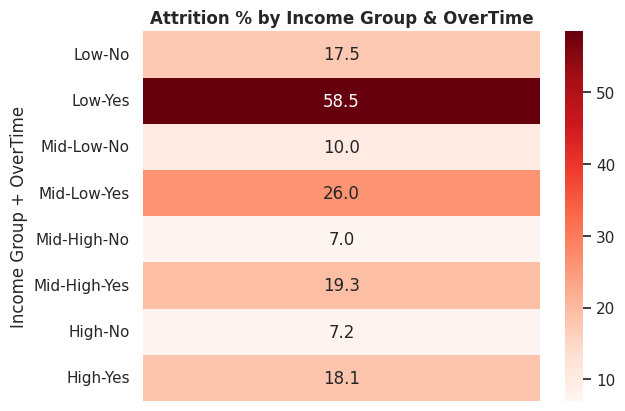

In [26]:
df['IncomeGroup'] = pd.qcut(df['MonthlyIncome'], q = 4, labels = ['Low', 'Mid-Low', 'Mid-High', 'High'])

income_overtime = pd.crosstab([df['IncomeGroup'], df['OverTime']], df['Attrition'], normalize = 'index') * 100

ax = sns.heatmap(income_overtime[['Yes']], annot = True, fmt = ".1f", cmap = 'Reds')
plt.title('Attrition % by Income Group & OverTime', fontweight = 'bold')
plt.ylabel('Income Group + OverTime')
plt.xlabel('')
ax.set_xticklabels('')
plt.savefig('attrition_by_income_overtime.png', dpi = 300, bbox_inches = 'tight')
plt.show()

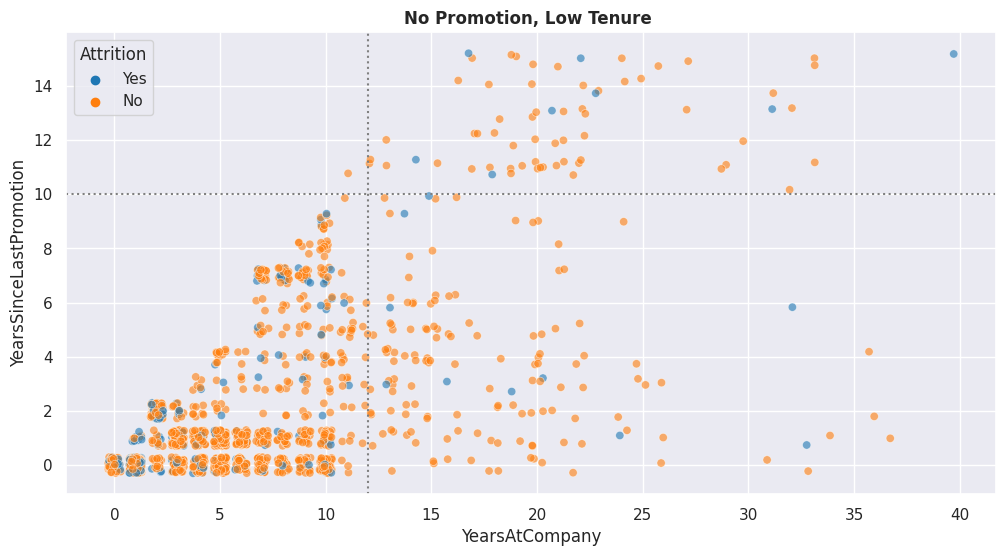

In [27]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df_jittered, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', hue = 'Attrition', alpha = 0.6)
plt.axvline(12, color = 'gray', linestyle = 'dotted')
plt.axhline(10, color = 'gray', linestyle = 'dotted')
plt.title('No Promotion, Low Tenure ', fontweight = 'bold')
plt.savefig('attrition_by_years_promotion.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Key Findings

### Demographics & Education
- Single and younger employees are more likely to leave
    - Attrition rate of single employees is ~25.5%, more than double that of married employees
- Employees with lower education levels show higher attrition rates (~18.2%)
- Longer commute distance correlates with increased attrition

### Departmental & Role
- Research & Development has lower attrition (~13.8%) compared to Sales and HR
- Sales Representatives have the highest attrition rate (~39.8%)
- Managers and Directors have significantly lower attrition (~4.7%)

### Engagement
- Low satisfaction (job, environment, relationships) and job involvement correlate with increased attrition
- As expected, bad work-life balance has highest attrition (~31.3%)
- Similarly, those working overtime leave at nearly 3× the rate of those who don’t (30.5% vs 10.4%)

### Career Progression
- Employees with lower pay and long gaps since last promotion are at higher risk
- Early-career employees with low pay and limited advancement are more likely to leave

## Recommendations

- Develop early-career retention programs focused on growth, mentoring, and clear promotion tracks
- Reevaluate compensation and promotion fairness, especially for entry-level and frontline employees
- Monitor workload and overtime, and improve work-life balance policies

# What's Next?

Build machine learning models to predict if an employee is likely to leave the company and to identify importance features influencing employee attrition.